# **Task 1 : Prediction using Supervised ML**
## **GRIP @ The Sparks Foundation**

---


*   In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

*  This is a simple linear regression task as it involves just two variables.




## **Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## **Reading the data**

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()  # Loading the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Shape of the dataframe
df.shape

(25, 2)

## **Data Visualization**

**Plotting the distribution of Scores**

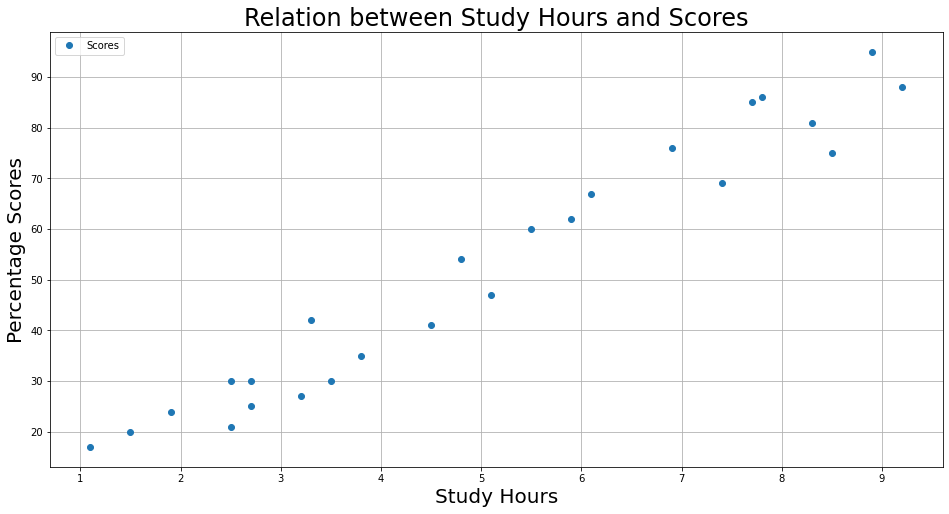

In [4]:
df.plot(x='Hours', y='Scores', style='o', figsize=(16,8))   # plt.scatter(df['Hours'], df['Scores']) 
plt.title('Relation between Study Hours and Scores', fontsize=24)
plt.xlabel('Study Hours', fontsize=20)
plt.ylabel('Percentage Scores', fontsize=20)
plt.grid(True)
plt.show()



---


**Observation:** We can clearly notice that Number of Hours studied is linearly related to the Scores of the student.<br>
So we can safely assume a positive linear relation between the number of hours studied and percentage of score.


---



## **Data Preprocessing**

**Now, we'll divide the data into "attributes" (input) and "labels" (output).**

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

## **Splitting the data for Training and Testing**

**Now that we have our attributes and labels, the next step is to split this data into training and test sets.**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17, 1), (17,), (8, 1), (8,))

## **Training the Linear Regression Model**

**As we have our training and test sets, now it is time to train our algorithm**

In [7]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print('Training Complete')

Training Complete


## **Plotting the Line Of Regression**

**Plotting the regression line for our Training Data**

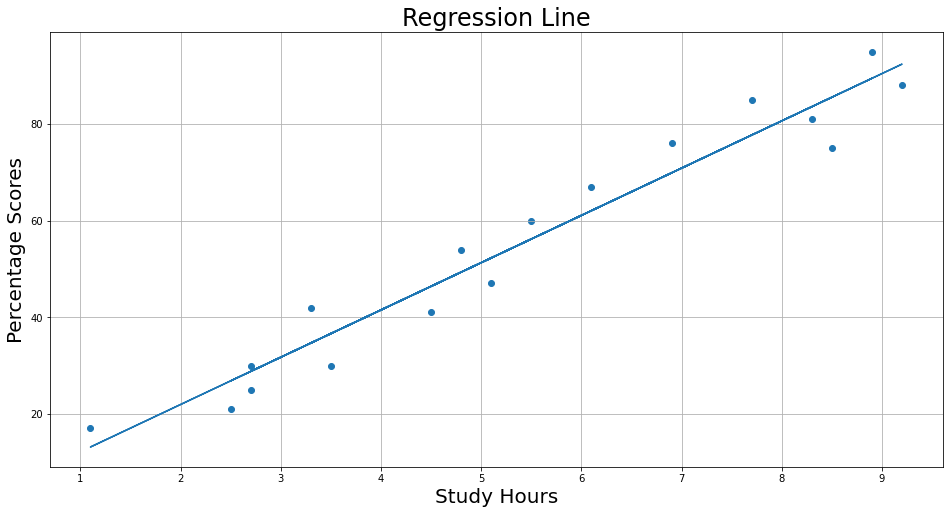

In [8]:
line = regression.coef_ * X_train + regression.intercept_   # since y = m*x + c
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.plot(X_train, line)
plt.title('Regression Line', fontsize=24)
plt.xlabel('Study Hours', fontsize=20)
plt.ylabel('Percentage Scores', fontsize=20)
plt.grid(True)
plt.show()

## **Making Predictions**

**Now we'll test the model by making some predictions, for which we'll use our Testing Data**

In [9]:
y_test_predict = regression.predict(X_test)
print(y_test_predict)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


## **Comparing the Actual Score with Predicted Score**

In [10]:
test_compare = pd.DataFrame({'Hours Studied': X_test.values.reshape(8,), 'Actual Score': y_test, 'Predicted Score': y_test_predict}).reset_index(drop=True)
test_compare

,Hours Studied,Actual Score,Predicted Score
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


**Plotting the Bar graph to visualize the difference between the actual and predicted score**

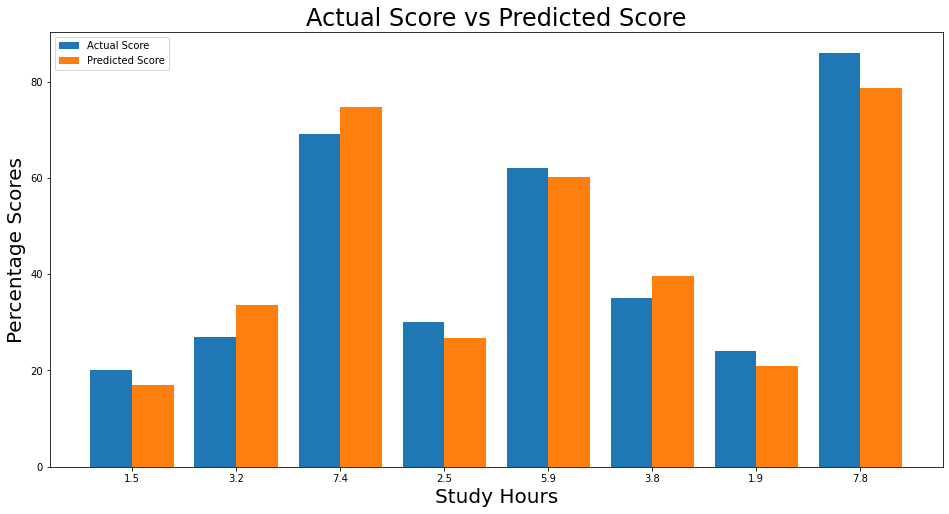

In [11]:
xpos = np.arange(len(X_test))
plt.figure(figsize=(16,8))
plt.bar(xpos-0.2, y_test, width=0.4, label='Actual Score')
plt.bar(xpos+0.2, y_test_predict, width=0.4, label='Predicted Score')
plt.xticks(xpos, X_test.values.reshape(8,))
plt.title('Actual Score vs Predicted Score', fontsize=24)
plt.xlabel('Study Hours', fontsize=20)
plt.ylabel('Percentage Scores', fontsize=20)
plt.legend()
plt.show()

## **What will be predicted score if a student study for 9.25 hrs/day?**

In [12]:
print('Predicted Score if a student studies for 9.25 hours/day is ', regression.predict([[9.25]])[0])

Predicted Score if a student studies for 9.25 hours/day is  92.91505723477056


## **Evaluating the Model**

*   **The final step is to evaluate the performance of the algorithm.**
*   **This step is particularly important to compare how well our algorithms perform on a particular dataset (i.e how fit is our model).**
*   **Here different errors have been calculated to compare the model performance and predict the accuracy.**

In [13]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_test_predict))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_test_predict))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)), "\n")
print('Testing Score : ', regression.score(X_test, y_test))  # R-2 Score
print('Training Score : ', regression.score(X_train, y_train))  # How the model generalized or fitted in the training data.

Mean Absolute Error :  4.419727808027651
Mean Squared Error :  22.965097212700428
Root Mean Squared Error :  4.7921912746363144 

Testing Score :  0.9568211104435257
Training Score :  0.9484997422695115
